# Task 2: User Engagement Analaysis

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from assistant_functions import Assistants
import plotter

In [5]:
#Import the cleaned dataframe into the current workspace
assistant = Assistants()
cleaned_csv_path = '../data/cleaned_data.csv'
df = assistant.read_csv(csv_path = cleaned_csv_path)
df.head()

file read as csv


,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [6]:
#Rename msisdn/number and dur._(ms)
df = df.rename(columns = {'msisdn/number':'msisdn','dur._(ms)':'duration'})
#See the improvement
df.head()

,bearer_id,start,start_ms,end,end_ms,duration,imsi,msisdn,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [7]:
#Generate general information about the dataframe using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146891 non-null  float64
 1   start                           146891 non-null  object 
 2   start_ms                        146891 non-null  float64
 3   end                             146891 non-null  object 
 4   end_ms                          146891 non-null  float64
 5   duration                        146891 non-null  float64
 6   imsi                            146891 non-null  float64
 7   msisdn                          146891 non-null  float64
 8   imei                            146891 non-null  float64
 9   last_location_name              146891 non-null  object 
 10  avg_rtt_dl_(ms)                 146891 non-null  float64
 11  avg_rtt_ul_(ms)                 146891 non-null  float64
 12  avg_bearer_tp_dl

User engagement analysis is tobe done per user so we need to aggregate the user data for the following metrices:               
    1)session frequency                                                                                                         
    2)the duration of the session                                                                                               
    3)the session total traffic(UL AND DL)                        

#### Session Frequency

In [9]:
aggregate_by_session_count = df.groupby('msisdn').agg({'bearer_id':'count'})
session_frequency_metrics = aggregate_by_session_count.sort_values(by = ['bearer_id'], ascending = False)
session_frequency_metrics.head()

,bearer_id
msisdn,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15


#### Total Duration of Customers

In [10]:
aggregate_by_duration = df.groupby('msisdn').agg({'duration':'sum'})
duration_metrics = aggregate_by_duration.sort_values(by = ['duration'], ascending = False)
duration_metrics.head()

,duration
msisdn,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0


#### Sessions total traffic download

In [11]:
aggregate_by_traffic = df.groupby('msisdn').agg({'total_data':'sum'})
total_traffic_metrics = aggregate_by_traffic.sort_values(by = ['total_data'], ascending = False)
total_traffic_metrics.head()

,total_data
msisdn,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09


Therefore we can now make up enaggement dataframe which is composed of session frequency, session duration and session total traffic...

In [15]:
users_engagement_metrics = df.groupby('msisdn').agg({'bearer_id':'count', 'duration':'sum','total_data':'sum'})
users_engagement_metrics = users_engagement_metrics.sort_values(by = ['bearer_id'], ascending = False)
users_engagement_metrics.head(10)

,bearer_id,duration,total_data
msisdn,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.376041e+10,12,5321667.0,7.132371e+09


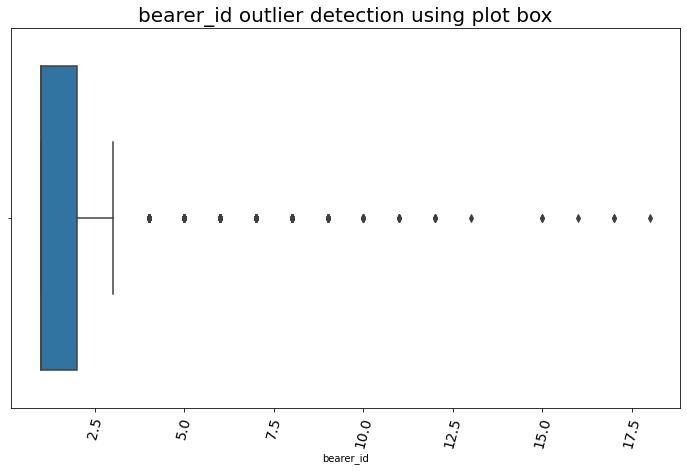

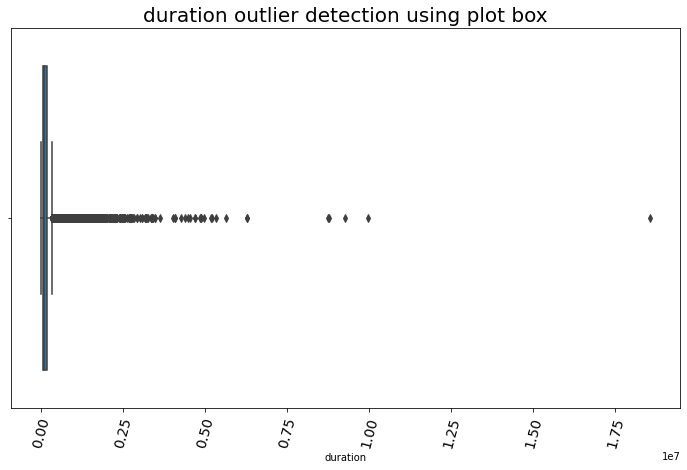

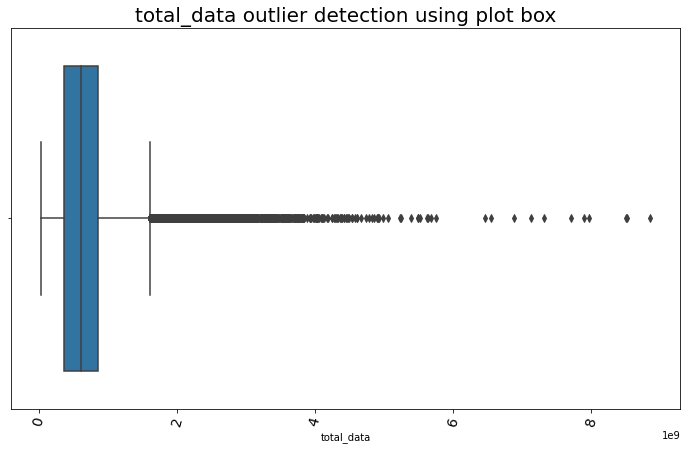

In [16]:
# Outlier detection using plot box from plotter functions...
col_list = ['bearer_id','duration','total_data']
for col in col_list:
    title = f'{col} outlier detection using plot_box'
    plotter.plot_box(users_engagement_metrics, col, title)